## Coastline Changes

By Jon, Damian and Martyna

## Instructions

First create an Anaconda environment and install geemap:

conda create -n gee python

conda activate gee

conda install mamba -c conda-forge

mamba install geemap -c conda-forge


In [42]:
import ee
import geemap

Map = geemap.Map(center=(54, -7), zoom=6)
Map

Map(center=[54, -7], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=Fa…

In [43]:
# Add Earth Engine dataset
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'min': 0,
    'max': 200,
    'bands': ['B3', 'B2', 'B1'], 
    'gamma': 1.4
}

Map.addLayer(landsat7, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 1)

In [56]:
# Draw any shapes on the map using the Drawing tools before executing this code block
feature = Map.draw_last_feature
roi = feature.geometry()

In [57]:
import os

out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'landsat.tif')

In [59]:
image = image.clip(roi).unmask()
geemap.ee_export_image(image, filename=filename, scale=30, region=roi, file_per_band=False)

Generating URL ...
Please wait ...
[WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Jon\\Downloads\\landsat.zip'


In [60]:
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B3', 'B2'])

aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


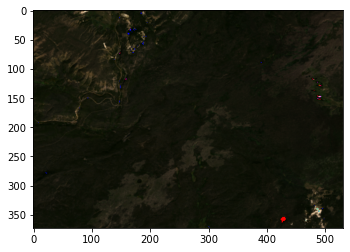

In [61]:
rgb_img_test = (255*((rgb_img[:, :, 0:3]-100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

## Utilities Commands

In [55]:
Map.remove_drawn_features()